# Understanding EU wide trends of home office

In [161]:
import pandas as pd
import numpy as np

In [91]:
ho_all = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/all_home_office_clean_wna.csv")

In [92]:
ho_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     3780 non-null   object 
 1   2015       2849 non-null   float64
 2   2016       2877 non-null   float64
 3   2017       2917 non-null   float64
 4   2018       2917 non-null   float64
 5   2019       2957 non-null   float64
 6   2020       2874 non-null   float64
 7   2021       3029 non-null   float64
 8   2022       2994 non-null   float64
 9   2023       2983 non-null   float64
 10  2024       2876 non-null   float64
 11  gender     3780 non-null   object 
 12  age_group  3780 non-null   object 
 13  children   3780 non-null   object 
dtypes: float64(10), object(4)
memory usage: 413.6+ KB


In [93]:
ho_all['region'].unique()

array(['European_Union_27_countries_from_2020',
       'Euro_area_20_countries_2015-2022', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece',
       'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia',
       'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Norway', 'United Kingdom',
       'Bosnia and Herzegovina', 'Montenegro', 'North Macedonia',
       'Serbia', 'Türkiye'], dtype=object)

In [19]:
ho_all['gender'].unique()

array(['total', 'male', 'female'], dtype=object)

In [20]:
ho_all['age_group'].unique()

array(['18-24', '18-64', '18+', '20-49', '25-49', '25-54', '55+'],
      dtype=object)

In [21]:
ho_all['children'].unique()

array(['total', '0', '1', '2', '3+'], dtype=object)

In [23]:
ho_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     3780 non-null   object 
 1   2015       2849 non-null   float64
 2   2016       2877 non-null   float64
 3   2017       2917 non-null   float64
 4   2018       2917 non-null   float64
 5   2019       2957 non-null   float64
 6   2020       2874 non-null   float64
 7   2021       3029 non-null   float64
 8   2022       2994 non-null   float64
 9   2023       2983 non-null   float64
 10  2024       2876 non-null   float64
 11  gender     3780 non-null   object 
 12  age_group  3780 non-null   object 
 13  children   3780 non-null   object 
dtypes: float64(10), object(4)
memory usage: 413.6+ KB


In [94]:
rows_to_drop = ho_all[ho_all.isnull().sum(axis=1) > 3]

print(rows_to_drop)

                      region  2015  2016  2017  2018  2019  2020  2021  2022  \
3                   Bulgaria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
14                    Cyprus   NaN   NaN   NaN   NaN   NaN   3.9   5.4   2.8   
24                   Romania   NaN   NaN   NaN   NaN   NaN   1.7   4.0   2.4   
29                    Norway   NaN   NaN   NaN   NaN   NaN   NaN  12.7  11.2   
30            United Kingdom   7.6   7.9   8.1   7.1   9.3   NaN   NaN   NaN   
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...   
3774          United Kingdom   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3775  Bosnia and Herzegovina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3776              Montenegro   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3777         North Macedonia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3778                  Serbia   NaN   NaN   NaN  14.6  24.6  18.4   NaN   NaN   

      2023  2024  gender age_group chil

We removed 1082 rows!

In [95]:
# dropping all rows with equal or more than 3 null values

ho_all.dropna(thresh=ho_all.shape[1] - 3, inplace=True)

ho_all.reset_index(drop=True, inplace=True)

In [96]:
ho_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698 entries, 0 to 2697
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     2698 non-null   object 
 1   2015       2647 non-null   float64
 2   2016       2677 non-null   float64
 3   2017       2645 non-null   float64
 4   2018       2654 non-null   float64
 5   2019       2669 non-null   float64
 6   2020       2602 non-null   float64
 7   2021       2695 non-null   float64
 8   2022       2676 non-null   float64
 9   2023       2680 non-null   float64
 10  2024       2555 non-null   float64
 11  gender     2698 non-null   object 
 12  age_group  2698 non-null   object 
 13  children   2698 non-null   object 
dtypes: float64(10), object(4)
memory usage: 295.2+ KB


In [97]:
na_rows_before = ho_all[ho_all.isnull().any(axis=1)]

na_rows_before

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
11,Croatia,1.2,NaN,2.8,1.4,1.2,3.1,7.4,4.7,3.3,4.3,total,18-24,total
13,Latvia,2.3,2.1,NaN,NaN,2.8,NaN,5.5,7.5,7.0,11.3,total,18-24,total
15,Luxembourg,35.1,19.1,18.5,15.8,16.0,20.2,19.2,18.9,17.1,NaN,total,18-24,total
17,Malta,1.6,2.1,NaN,3.2,2.3,18.3,18.4,13.3,15.1,14.2,total,18-24,total
22,Slovenia,5.3,3.6,5.2,3.2,4.7,6.0,8.0,NaN,NaN,NaN,total,18-24,total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,Sweden,23.8,31.6,28.1,22.6,NaN,NaN,43.4,63.6,50.2,58.5,female,55+,1
2692,Türkiye,12.8,15.0,16.5,15.3,19.3,18.6,17.4,14.3,21.6,NaN,female,55+,1
2695,Serbia,17.9,10.1,8.4,10.4,18.6,12.4,8.1,NaN,7.5,NaN,female,55+,2
2696,Türkiye,11.8,9.1,10.6,17.1,17.5,18.5,20.6,14.2,22.4,NaN,female,55+,2


In [98]:
ho_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698 entries, 0 to 2697
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     2698 non-null   object 
 1   2015       2647 non-null   float64
 2   2016       2677 non-null   float64
 3   2017       2645 non-null   float64
 4   2018       2654 non-null   float64
 5   2019       2669 non-null   float64
 6   2020       2602 non-null   float64
 7   2021       2695 non-null   float64
 8   2022       2676 non-null   float64
 9   2023       2680 non-null   float64
 10  2024       2555 non-null   float64
 11  gender     2698 non-null   object 
 12  age_group  2698 non-null   object 
 13  children   2698 non-null   object 
dtypes: float64(10), object(4)
memory usage: 295.2+ KB


In [99]:
# filling lone nan values with interpolation
ho_all_interpolated = ho_all.copy()





In [100]:
ho_all_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698 entries, 0 to 2697
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     2698 non-null   object 
 1   2015       2647 non-null   float64
 2   2016       2677 non-null   float64
 3   2017       2645 non-null   float64
 4   2018       2654 non-null   float64
 5   2019       2669 non-null   float64
 6   2020       2602 non-null   float64
 7   2021       2695 non-null   float64
 8   2022       2676 non-null   float64
 9   2023       2680 non-null   float64
 10  2024       2555 non-null   float64
 11  gender     2698 non-null   object 
 12  age_group  2698 non-null   object 
 13  children   2698 non-null   object 
dtypes: float64(10), object(4)
memory usage: 295.2+ KB


In [101]:
# Ensure year columns are actually numeric in dtype
numerical_cols = [str(y) for y in range(2015, 2025)]
ho_all_interpolated[numerical_cols] = ho_all_interpolated[numerical_cols].astype(float)

# Sort columns by numeric year order just in case
numerical_cols_sorted = sorted(numerical_cols, key=int)

# Interpolate across years for each row
ho_all_interpolated[numerical_cols_sorted] = (
    ho_all_interpolated[numerical_cols_sorted]
    .interpolate(axis=1)  # interpolate left→right
    .bfill(axis=1)        # fill NaN from the right
    .ffill(axis=1)        # fill NaN from the left
)

In [109]:
ho_all_interpolated[numerical_cols_sorted] = ho_all_interpolated[numerical_cols_sorted].round(1)


In [107]:
ho_all.head(20)

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
0,European_Union_27_countries_from_2020,4.5,4.6,4.6,4.7,5.3,10.3,12.4,11.1,10.4,10.0,total,18-24,total
1,Euro_area_20_countries_2015-2022,4.5,4.3,4.6,4.7,5.3,11.1,13.7,12.3,11.0,10.7,total,18-24,total
2,Belgium,8.9,8.6,9.3,9.6,10.3,13.3,16.0,11.9,11.3,11.2,total,18-24,total
3,Czechia,2.7,2.8,3.5,3.9,4.3,4.8,7.3,6.5,10.2,8.4,total,18-24,total
4,Denmark,5.8,9.3,8.1,7.2,8.1,12.0,10.4,8.6,7.9,10.6,total,18-24,total
5,Germany,2.9,2.7,2.9,3.3,3.7,12.1,15.0,13.2,11.3,11.4,total,18-24,total
6,Estonia,6.7,8.6,9.0,10.7,11.7,14.4,15.4,12.8,20.6,17.9,total,18-24,total
7,Ireland,4.2,3.7,4.7,5.5,5.5,13.8,14.9,13.6,12.0,13.7,total,18-24,total
8,Greece,2.6,2.4,2.2,1.8,2.4,4.7,10.4,6.2,6.1,3.6,total,18-24,total
9,Spain,1.8,1.7,1.8,1.9,2.1,6.7,8.4,6.7,7.6,5.9,total,18-24,total


In [110]:
ho_all_interpolated.head(20)

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
0,European_Union_27_countries_from_2020,4.5,4.6,4.6,4.7,5.3,10.3,12.4,11.1,10.4,10.0,total,18-24,total
1,Euro_area_20_countries_2015-2022,4.5,4.3,4.6,4.7,5.3,11.1,13.7,12.3,11.0,10.7,total,18-24,total
2,Belgium,8.9,8.6,9.3,9.6,10.3,13.3,16.0,11.9,11.3,11.2,total,18-24,total
3,Czechia,2.7,2.8,3.5,3.9,4.3,4.8,7.3,6.5,10.2,8.4,total,18-24,total
4,Denmark,5.8,9.3,8.1,7.2,8.1,12.0,10.4,8.6,7.9,10.6,total,18-24,total
5,Germany,2.9,2.7,2.9,3.3,3.7,12.1,15.0,13.2,11.3,11.4,total,18-24,total
6,Estonia,6.7,8.6,9.0,10.7,11.7,14.4,15.4,12.8,20.6,17.9,total,18-24,total
7,Ireland,4.2,3.7,4.7,5.5,5.5,13.8,14.9,13.6,12.0,13.7,total,18-24,total
8,Greece,2.6,2.4,2.2,1.8,2.4,4.7,10.4,6.2,6.1,3.6,total,18-24,total
9,Spain,1.8,1.7,1.8,1.9,2.1,6.7,8.4,6.7,7.6,5.9,total,18-24,total


In [103]:
ho_all_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698 entries, 0 to 2697
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     2698 non-null   object 
 1   2015       2698 non-null   float64
 2   2016       2698 non-null   float64
 3   2017       2698 non-null   float64
 4   2018       2698 non-null   float64
 5   2019       2698 non-null   float64
 6   2020       2698 non-null   float64
 7   2021       2698 non-null   float64
 8   2022       2698 non-null   float64
 9   2023       2698 non-null   float64
 10  2024       2698 non-null   float64
 11  gender     2698 non-null   object 
 12  age_group  2698 non-null   object 
 13  children   2698 non-null   object 
dtypes: float64(10), object(4)
memory usage: 295.2+ KB


In [111]:
ho_all_interpolated.to_csv("all_home_office_data_clean.csv", index=False)


In [37]:
na_rows_after = ho_all_interpolated[ho_all_interpolated.isnull().any(axis=1)]

na_rows_after

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
39,Croatia,NaN,NaN,2.700000,1.600000,2.600000,3.6,8.3,5.9,3.6,4.6,total,18-24,0
44,Malta,NaN,2.6,2.800000,3.000000,2.500000,19.8,20.0,18.2,20.9,15.2,total,18-24,0
135,Bulgaria,NaN,1.1,1.200000,0.900000,1.100000,2.8,6.8,4.4,2.2,3.6,total,18-64,1
206,Latvia,NaN,4.9,5.400000,5.900000,6.500000,11.3,12.6,11.9,8.9,13.0,total,18-64,3+
286,Bulgaria,NaN,1.1,1.200000,1.000000,1.100000,2.8,6.8,4.3,2.2,3.6,total,18+,1
357,Latvia,NaN,5.0,5.250000,5.500000,6.500000,11.2,12.5,11.8,8.9,13.0,total,18+,3+
437,Bulgaria,NaN,1.0,1.200000,0.800000,1.000000,2.8,6.8,4.2,2.0,3.7,total,20-49,1
508,Latvia,NaN,4.9,5.533333,6.166667,6.800000,10.8,12.6,12.3,8.8,13.0,total,20-49,3+
588,Bulgaria,NaN,1.0,1.200000,1.100000,1.000000,2.9,6.8,4.3,2.1,3.9,total,25-49,1
659,Latvia,NaN,4.9,5.233333,5.566667,5.900000,11.1,13.3,12.4,9.1,13.6,total,25-49,3+


# Removing the cluster

To focus solely on difference between countries and EU average, we will drop all specific dimensions such as age group, number of children and so on to only get values of 'total'.

That means
- gender = total
- age_group = 18-64
- children = total


In [112]:
total_children_df = ho_all_interpolated[ho_all_interpolated['children'] == 'total'].copy()

total_children_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 0 to 2647
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     630 non-null    object 
 1   2015       630 non-null    float64
 2   2016       630 non-null    float64
 3   2017       630 non-null    float64
 4   2018       630 non-null    float64
 5   2019       630 non-null    float64
 6   2020       630 non-null    float64
 7   2021       630 non-null    float64
 8   2022       630 non-null    float64
 9   2023       630 non-null    float64
 10  2024       630 non-null    float64
 11  gender     630 non-null    object 
 12  age_group  630 non-null    object 
 13  children   630 non-null    object 
dtypes: float64(10), object(4)
memory usage: 73.8+ KB


In [113]:
total_children_age_df = total_children_df[total_children_df['age_group'] == '18-64'].copy()

total_children_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 70 to 1907
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     93 non-null     object 
 1   2015       93 non-null     float64
 2   2016       93 non-null     float64
 3   2017       93 non-null     float64
 4   2018       93 non-null     float64
 5   2019       93 non-null     float64
 6   2020       93 non-null     float64
 7   2021       93 non-null     float64
 8   2022       93 non-null     float64
 9   2023       93 non-null     float64
 10  2024       93 non-null     float64
 11  gender     93 non-null     object 
 12  age_group  93 non-null     object 
 13  children   93 non-null     object 
dtypes: float64(10), object(4)
memory usage: 10.9+ KB


In [114]:
total_children_age_gender = total_children_age_df[total_children_age_df['gender'] == 'total'].copy()

total_children_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 70 to 100
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     31 non-null     object 
 1   2015       31 non-null     float64
 2   2016       31 non-null     float64
 3   2017       31 non-null     float64
 4   2018       31 non-null     float64
 5   2019       31 non-null     float64
 6   2020       31 non-null     float64
 7   2021       31 non-null     float64
 8   2022       31 non-null     float64
 9   2023       31 non-null     float64
 10  2024       31 non-null     float64
 11  gender     31 non-null     object 
 12  age_group  31 non-null     object 
 13  children   31 non-null     object 
dtypes: float64(10), object(4)
memory usage: 3.6+ KB


In [115]:
annual_country_ho = total_children_age_gender.copy()

In [116]:
annual_country_ho.reset_index(drop=True, inplace=True)

In [117]:
annual_country_ho.head(40)

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
0,European_Union_27_countries_from_2020,12.9,13.1,13.1,13.5,14.4,20.6,23.3,21.4,21.2,21.7,total,18-64,total
1,Euro_area_20_countries_2015-2022,13.1,13.2,13.4,13.9,14.8,22.1,25.0,23.3,22.9,23.3,total,18-64,total
2,Belgium,22.3,22.7,23.5,22.7,24.7,33.8,40.0,35.6,36.1,36.2,total,18-64,total
3,Bulgaria,1.0,1.1,1.0,0.9,1.1,3.0,6.6,4.5,2.8,3.0,total,18-64,total
4,Czechia,7.6,8.9,9.1,9.4,10.0,13.1,14.5,15.7,15.1,16.5,total,18-64,total
5,Denmark,29.0,34.6,30.8,28.8,29.2,36.6,37.6,34.9,36.2,42.4,total,18-64,total
6,Germany,11.3,11.0,10.8,11.6,12.6,21.0,25.2,24.2,23.4,24.3,total,18-64,total
7,Estonia,13.0,15.0,16.1,19.5,19.8,23.1,26.4,25.7,28.1,29.3,total,18-64,total
8,Ireland,13.4,12.8,16.5,19.4,19.9,32.1,40.2,36.9,37.5,37.1,total,18-64,total
9,Greece,5.6,6.0,5.5,5.1,5.2,10.4,15.9,10.7,7.4,7.9,total,18-64,total


In [118]:
annual_country_ho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     31 non-null     object 
 1   2015       31 non-null     float64
 2   2016       31 non-null     float64
 3   2017       31 non-null     float64
 4   2018       31 non-null     float64
 5   2019       31 non-null     float64
 6   2020       31 non-null     float64
 7   2021       31 non-null     float64
 8   2022       31 non-null     float64
 9   2023       31 non-null     float64
 10  2024       31 non-null     float64
 11  gender     31 non-null     object 
 12  age_group  31 non-null     object 
 13  children   31 non-null     object 
dtypes: float64(10), object(4)
memory usage: 3.5+ KB


# Data exploration

Here we will

- Transform data into long format
- Key statistics
- Visualize overall EU trends
- Visualize overall per country trend
- Identify distribution
- Find outlier countries
- Rank countries

In [119]:
annual_countries_wide = annual_country_ho.copy()

In [120]:
annual_countries_long = pd.melt(annual_countries_wide, id_vars=['region', 'gender', 'age_group', 'children'],
                  value_vars=['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024'],
                  var_name='year',
                  value_name='value')

In [121]:
annual_countries_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     310 non-null    object 
 1   gender     310 non-null    object 
 2   age_group  310 non-null    object 
 3   children   310 non-null    object 
 4   year       310 non-null    object 
 5   value      310 non-null    float64
dtypes: float64(1), object(5)
memory usage: 14.7+ KB


In [122]:
annual_countries_long['year'] = pd.to_numeric(annual_countries_long['year'])

annual_countries_long['value'] = pd.to_numeric(annual_countries_long['value'])



In [123]:
annual_countries_long.head()

,region,gender,age_group,children,year,value
0,European_Union_27_countries_from_2020,total,18-64,total,2015,12.9
1,Euro_area_20_countries_2015-2022,total,18-64,total,2015,13.1
2,Belgium,total,18-64,total,2015,22.3
3,Bulgaria,total,18-64,total,2015,1.0
4,Czechia,total,18-64,total,2015,7.6


In [124]:
annual_countries_long_countries = annual_countries_long[~annual_countries_long['region'].isin(['European_Union_27_countries_from_2020', 'Euro_area_20_countries_2015-2022'])]

In [125]:
annual_countries_long_countries['value'].describe()


count    290.000000
mean      17.520000
std       12.417106
min        0.600000
25%        7.125000
50%       14.050000
75%       26.925000
max       50.400000
Name: value, dtype: float64

EDA per countries:

- Average percent of adults working from home in EU over all years are 17.5.

- Standard deviation is about 12.4, indicating that the values are fairly spread out from the mean

- Lowest percent of adults working from home is 0.6.

- 25% of the values are at or below 7.1.

- The median percent of adults working from home across EU over all years is 14. Since the mean (17.5) is higher than the median (14), the data is likely skewed to the right (has a longer tail on the higher end).

- 75% of the values are at or below 27.

- The highest percent of adults working from home in the dataset is 50.4.

In [126]:
EU_average_long = annual_countries_long[annual_countries_long['region'] == 'European_Union_27_countries_from_2020']

In [127]:
EU_average_long['value'].describe()

count    10.000000
mean     17.520000
std       4.413061
min      12.900000
25%      13.200000
50%      17.500000
75%      21.350000
max      23.300000
Name: value, dtype: float64

EDA per EU average:

- Average percent of adults working from home in EU over all years are 17.5.

- Standard deviation is about 4.4, indicating that the values are not spread out far from the mean

- Lowest percent of adults working from home is 12.9.

- 25% of the values are at or below 13.2.

- The median percent of adults working from home across EU over all years is 17.5. Since the mean (17.5) the same as median, the data is likely normally distributed.

- 75% of the values are at or below 27.

- The highest percent of adults working from home in the dataset is 23.3.

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='year', ylabel='value'>

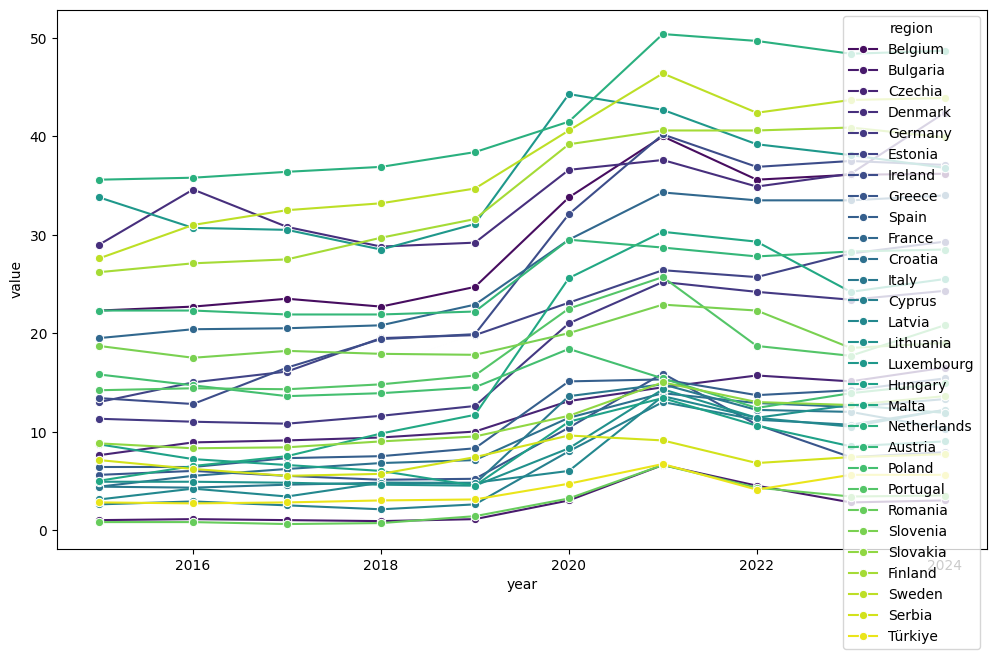

In [129]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=annual_countries_long_countries, x='year', y='value', hue='region', marker='o', palette='viridis')

/var/folders/gt/qx94m45d4t1_dn0smm6xb0p40000gn/T/ipykernel_43378/3019675999.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')


<Axes: xlabel='year', ylabel='value'>

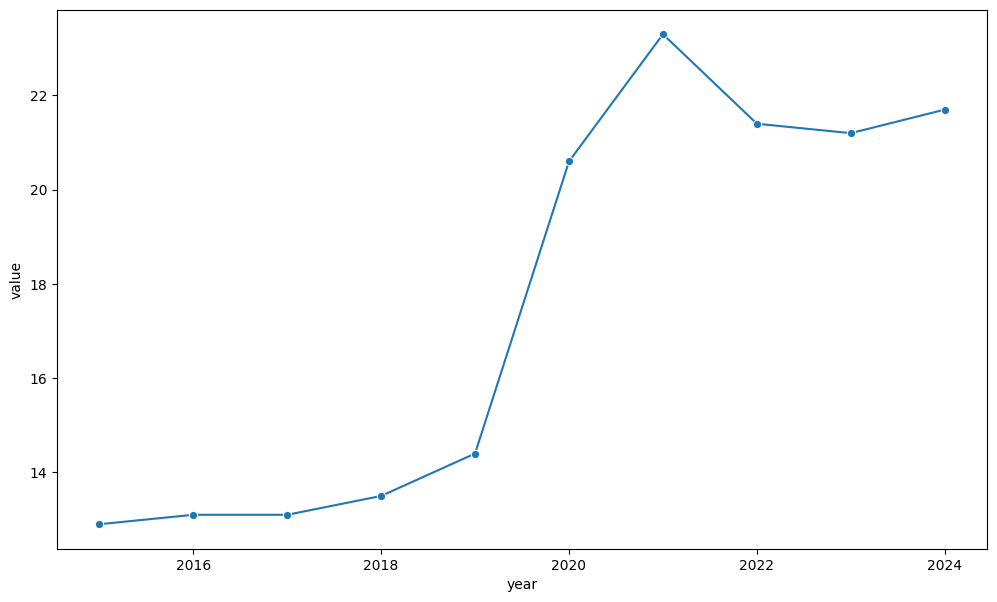

In [130]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')

/var/folders/gt/qx94m45d4t1_dn0smm6xb0p40000gn/T/ipykernel_43378/274625240.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')


(0.0, 100.0)

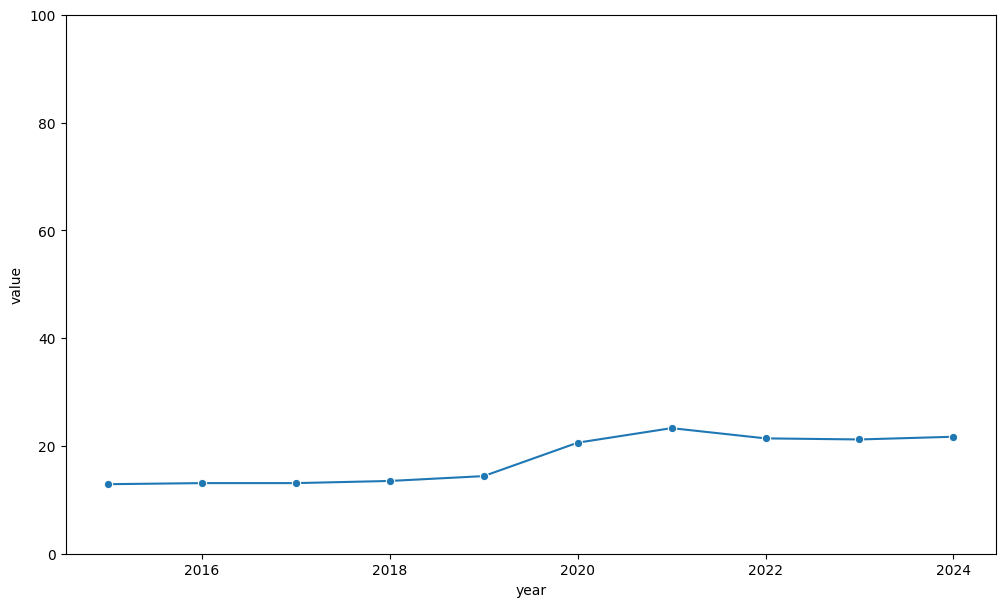

In [131]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=EU_average_long, x='year', y='value', marker='o', palette='viridis')
plt.ylim(0, 100)

In [77]:
annual_countries_long_countries.to_csv('annual_countries_long_countries.csv', index=False)

# From DB

## These are average values for countries for all years

- Bulgaria	2.5
- Romania	2.5300000000000002
- Türkiye	4.11
- Cyprus	6.780000000000001
- Serbia	7.25
- Latvia	7.4
- Greece	7.9700000000000015
- Lithuania	8.23
- Hungary	8.55
- Italy	8.57
- Croatia	9.4
- Spain	10.960000000000003
- Slovakia	10.989999999999998
- Czechia	11.989999999999998
- Poland	14.750000000000004
- Malta	17.54
- Germany	17.540000000000003
- Portugal	17.880000000000003
- Slovenia	19.28
- Estonia	21.6
- Austria	25.340000000000003
- Ireland	26.580000000000002
- France	26.889999999999997
- Belgium	29.759999999999998
- Denmark	34.01
- Finland	34.33
- Luxembourg	35.57
- Sweden	37.01
- Netherlands	42.17999999999999

# Making clusters

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [133]:
df = annual_countries_long_countries[['region', 'year', 'value']]

pivot_df = df.pivot(index='region', columns='year', values='value')

scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_df)

pivot_df.head(10)

year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
region,,,,,,,,,,
Austria,22.3,22.3,21.9,21.9,22.2,29.5,28.7,27.8,28.3,28.5
Belgium,22.3,22.7,23.5,22.7,24.7,33.8,40.0,35.6,36.1,36.2
Bulgaria,1.0,1.1,1.0,0.9,1.1,3.0,6.6,4.5,2.8,3.0
Croatia,4.4,5.5,6.2,6.8,7.1,11.4,13.9,12.9,12.5,13.3
Cyprus,2.6,2.9,2.5,2.1,2.6,8.0,13.0,11.2,10.7,12.2
Czechia,7.6,8.9,9.1,9.4,10.0,13.1,14.5,15.7,15.1,16.5
Denmark,29.0,34.6,30.8,28.8,29.2,36.6,37.6,34.9,36.2,42.4
Estonia,13.0,15.0,16.1,19.5,19.8,23.1,26.4,25.7,28.1,29.3
Finland,26.2,27.1,27.5,29.7,31.6,39.2,40.6,40.6,40.9,39.9


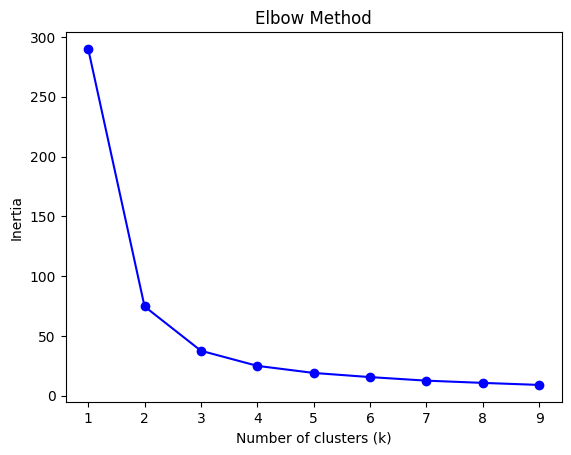

In [134]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pivot_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [135]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pivot_df['cluster'] = kmeans.fit_predict(pivot_scaled)

In [136]:
df_with_clusters = df.merge(
    pivot_df['cluster'].reset_index(),
    on='region',
    how='left'
)

In [137]:
df_with_clusters.head(-20)

,region,year,value,cluster
0,Belgium,2015,22.3,1
1,Bulgaria,2015,1.0,2
2,Czechia,2015,7.6,2
3,Denmark,2015,29.0,1
4,Germany,2015,11.3,0
...,...,...,...,...
265,Germany,2024,24.3,0
266,Estonia,2024,29.3,0
267,Ireland,2024,37.1,0
268,Greece,2024,7.9,2


In [138]:
# checking if country has same cluster

df_with_clusters[df_with_clusters['region'] == 'Belgium']

,region,year,value,cluster
0,Belgium,2015,22.3,1
29,Belgium,2016,22.7,1
58,Belgium,2017,23.5,1
87,Belgium,2018,22.7,1
116,Belgium,2019,24.7,1
145,Belgium,2020,33.8,1
174,Belgium,2021,40.0,1
203,Belgium,2022,35.6,1
232,Belgium,2023,36.1,1
261,Belgium,2024,36.2,1


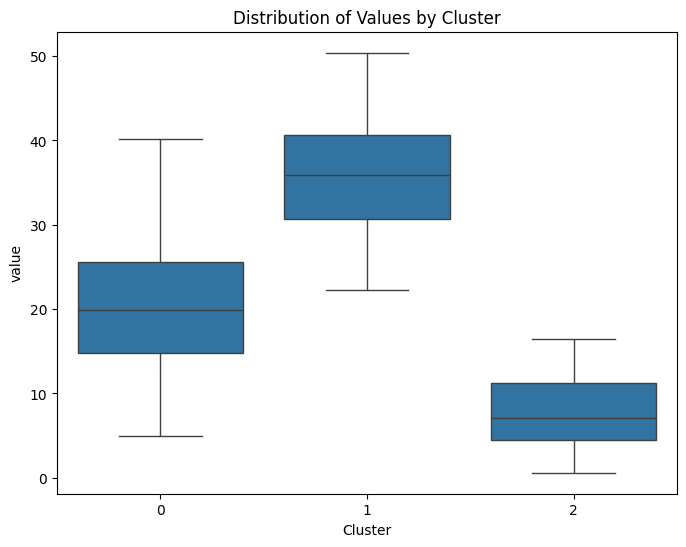

In [140]:
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='value', data=df_with_clusters)
plt.title('Distribution of Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('value')
plt.show()

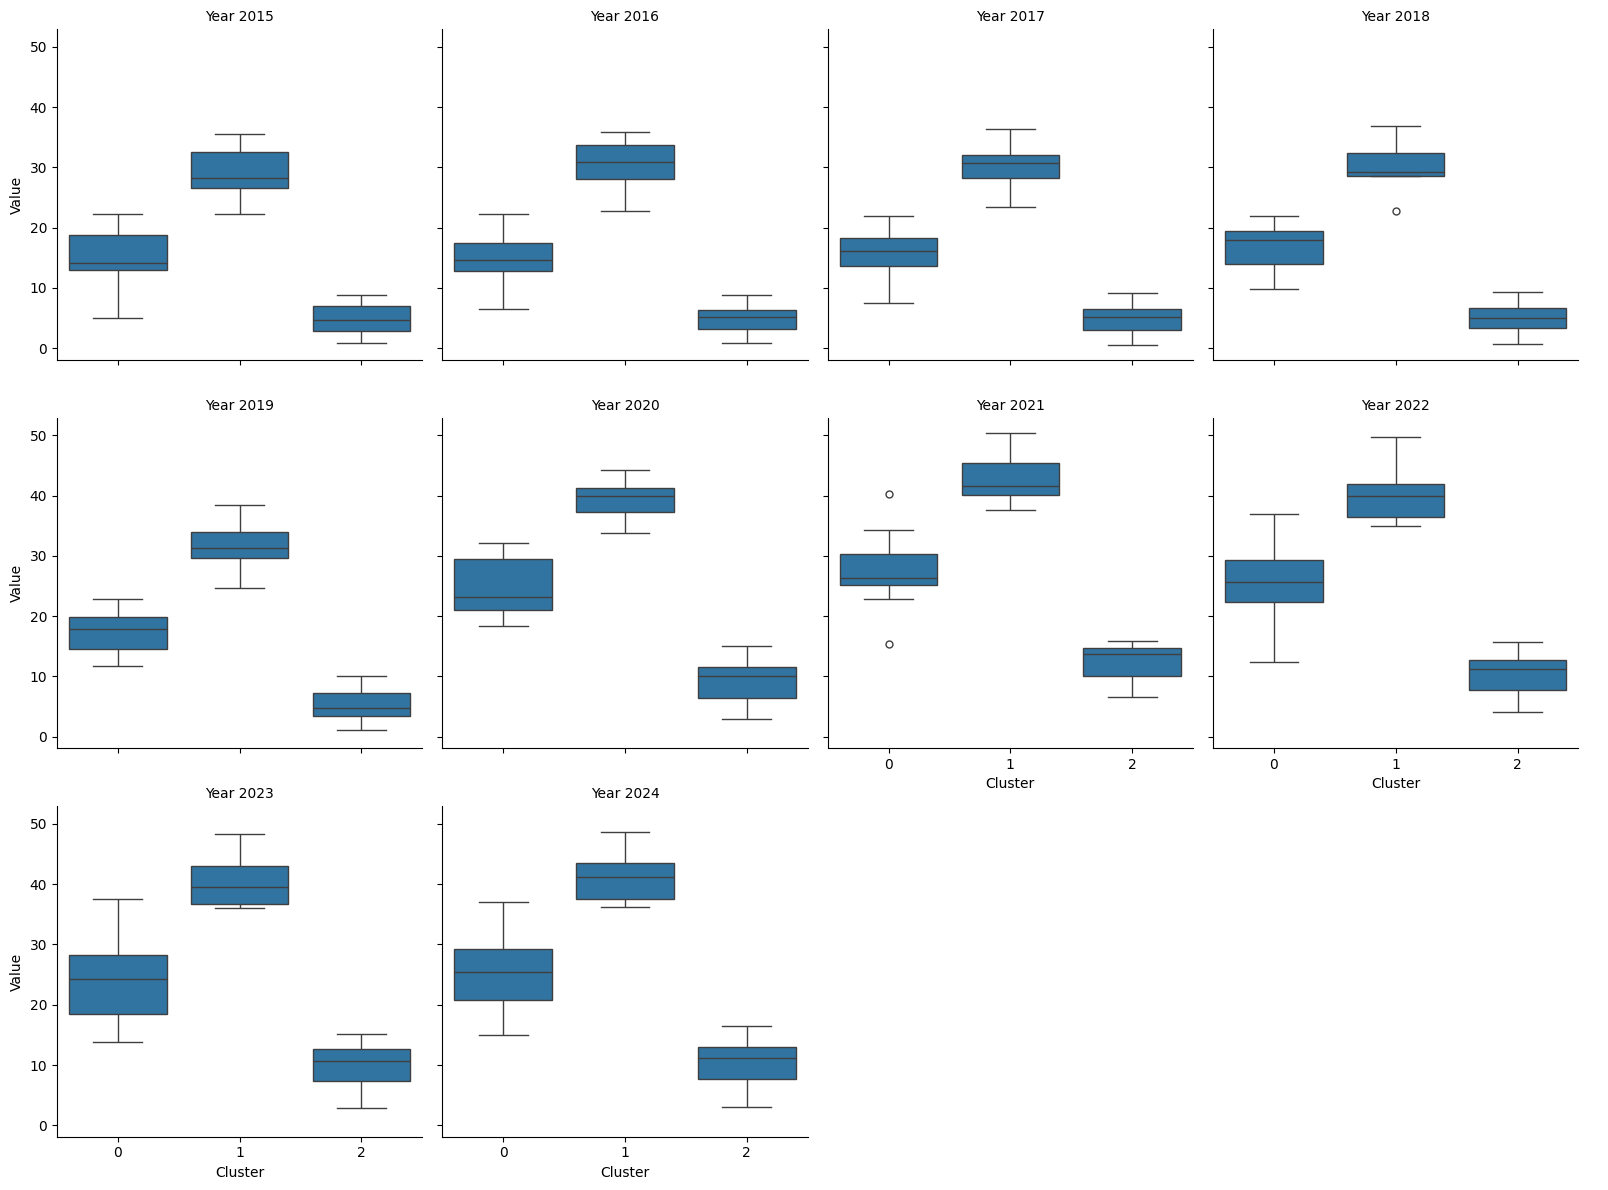

In [141]:
g = sns.catplot(
    x='cluster', y='value',
    col='year',
    data=df_with_clusters,
    kind='box',
    col_wrap=4,  # adjust depending on number of years
    height=4
)
g.set_titles("Year {col_name}")
g.set_axis_labels("Cluster", "Value")
plt.show()

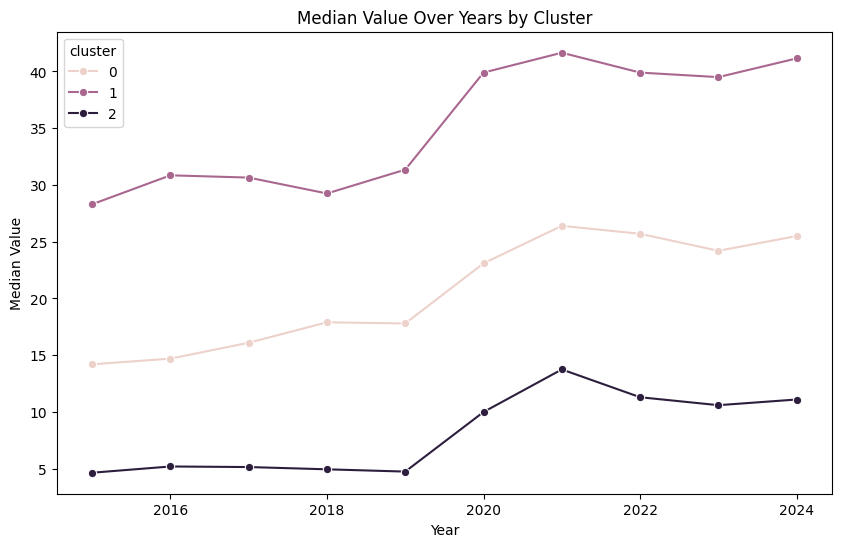

In [142]:
median_values = (
    df_with_clusters.groupby(['cluster', 'year'])['value']
    .median()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='value', hue='cluster', data=median_values, marker='o')
plt.title('Median Value Over Years by Cluster')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.show()

In [143]:
df_with_clusters.head()

,region,year,value,cluster
0,Belgium,2015,22.3,1
1,Bulgaria,2015,1.0,2
2,Czechia,2015,7.6,2
3,Denmark,2015,29.0,1
4,Germany,2015,11.3,0


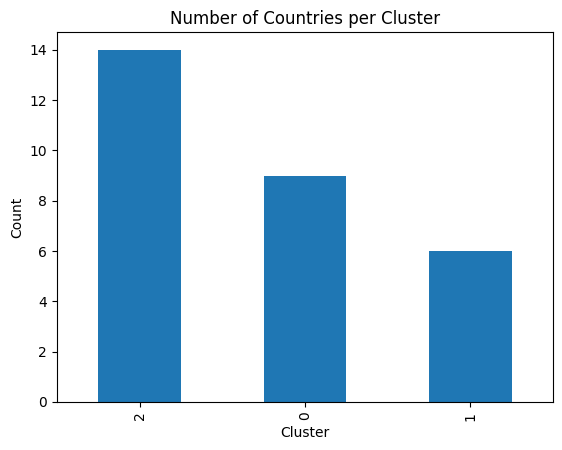

In [144]:
df_with_clusters[['region', 'cluster']].drop_duplicates().cluster.value_counts().plot(kind='bar')
plt.title('Number of Countries per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [145]:
country_clusters = df_with_clusters[['region', 'cluster']].drop_duplicates()
country_clusters = country_clusters.sort_values('cluster').reset_index(drop=True)
print(country_clusters)

         region  cluster
0      Slovenia        0
1       Austria        0
2        Poland        0
3      Portugal        0
4        France        0
5       Ireland        0
6         Malta        0
7       Germany        0
8       Estonia        0
9    Luxembourg        1
10      Denmark        1
11      Finland        1
12       Sweden        1
13  Netherlands        1
14      Belgium        1
15     Slovakia        2
16      Romania        2
17    Lithuania        2
18       Serbia        2
19       Latvia        2
20       Cyprus        2
21        Italy        2
22      Croatia        2
23        Spain        2
24       Greece        2
25      Czechia        2
26     Bulgaria        2
27      Hungary        2
28      Türkiye        2


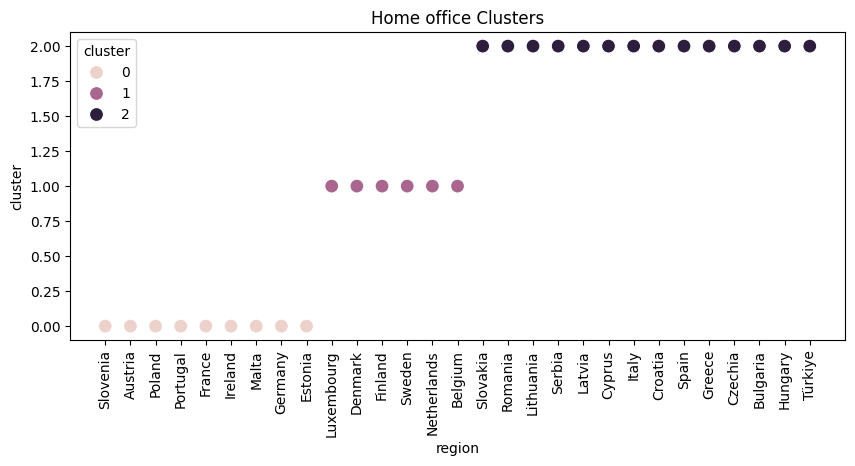

In [154]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=country_clusters, x='region', y='cluster', hue='cluster', s=100)
plt.xticks(rotation=90)
plt.title('Home office Clusters')
plt.show()

In [146]:
df_with_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   290 non-null    object 
 1   year     290 non-null    int64  
 2   value    290 non-null    float64
 3   cluster  290 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 8.1+ KB


In [147]:
ho_all_interpolated = ho_all_interpolated.merge(
    country_clusters,
    on='region',
    how='left'  # keep all rows from ho_all_interpolated
)

In [149]:
ho_all_interpolated.head()

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children,cluster
0,European_Union_27_countries_from_2020,4.5,4.6,4.6,4.7,5.3,10.3,12.4,11.1,10.4,10.0,total,18-24,total,NaN
1,Euro_area_20_countries_2015-2022,4.5,4.3,4.6,4.7,5.3,11.1,13.7,12.3,11.0,10.7,total,18-24,total,NaN
2,Belgium,8.9,8.6,9.3,9.6,10.3,13.3,16.0,11.9,11.3,11.2,total,18-24,total,1.0
3,Czechia,2.7,2.8,3.5,3.9,4.3,4.8,7.3,6.5,10.2,8.4,total,18-24,total,2.0
4,Denmark,5.8,9.3,8.1,7.2,8.1,12.0,10.4,8.6,7.9,10.6,total,18-24,total,1.0


In [150]:
ho_all_interpolated = ho_all_interpolated[
    ~ho_all_interpolated['region'].isin([
        'European_Union_27_countries_from_2020',
        'Euro_area_20_countries_2015-2022'
    ])
]

In [151]:
ho_all_interpolated['cluster'] = ho_all_interpolated['cluster'].astype(int)


In [153]:
ho_all_interpolated.head()

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children,cluster
2,Belgium,8.9,8.6,9.3,9.6,10.3,13.3,16.0,11.9,11.3,11.2,total,18-24,total,1
3,Czechia,2.7,2.8,3.5,3.9,4.3,4.8,7.3,6.5,10.2,8.4,total,18-24,total,2
4,Denmark,5.8,9.3,8.1,7.2,8.1,12.0,10.4,8.6,7.9,10.6,total,18-24,total,1
5,Germany,2.9,2.7,2.9,3.3,3.7,12.1,15.0,13.2,11.3,11.4,total,18-24,total,0
6,Estonia,6.7,8.6,9.0,10.7,11.7,14.4,15.4,12.8,20.6,17.9,total,18-24,total,0


In [154]:
annual_countries_long_2 = pd.melt(ho_all_interpolated, id_vars=['region', 'gender', 'age_group', 'children', 'cluster'],
                  value_vars=['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024'],
                  var_name='year',
                  value_name='home_office_percent')

In [155]:
annual_countries_long_2.head()

,region,gender,age_group,children,cluster,year,home_office_percent
0,Belgium,total,18-24,total,1,2015,8.9
1,Czechia,total,18-24,total,2,2015,2.7
2,Denmark,total,18-24,total,1,2015,5.8
3,Germany,total,18-24,total,0,2015,2.9
4,Estonia,total,18-24,total,0,2015,6.7


In [156]:
cluster_labels = {
    0: "Mid-HO",
    1: "High-HO",
    2: "Low-HO"
}

annual_countries_long_2['cluster_label'] = annual_countries_long_2['cluster'].map(cluster_labels)


In [159]:
annual_countries_long_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25030 entries, 0 to 25029
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               25030 non-null  object 
 1   gender               25030 non-null  object 
 2   age_group            25030 non-null  object 
 3   children             25030 non-null  object 
 4   cluster              25030 non-null  int64  
 5   year                 25030 non-null  object 
 6   home_office_percent  25030 non-null  float64
 7   cluster_label        25030 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [160]:
annual_countries_long_2.to_csv("all_home_office_clean.csv", index=False)


# Finding correlation between home office data and external factors

In [303]:
annual_countries_long_2

,region,gender,age_group,children,cluster,year,home_office_percent,cluster_label
0,Belgium,total,18-24,total,1,2015,8.9,High-HO
1,Czechia,total,18-24,total,2,2015,2.7,Low-HO
2,Denmark,total,18-24,total,1,2015,5.8,High-HO
3,Germany,total,18-24,total,0,2015,2.9,Mid-HO
4,Estonia,total,18-24,total,0,2015,6.7,Mid-HO
...,...,...,...,...,...,...,...,...
25025,Türkiye,female,55+,1,2,2024,21.6,Low-HO
25026,Netherlands,female,55+,2,1,2024,65.4,High-HO
25027,Serbia,female,55+,2,2,2024,7.5,Low-HO
25028,Türkiye,female,55+,2,2,2024,22.4,Low-HO


## Creating df with 'home office sector', that is, 

- Information and communication

- Financial and insurance activities

- Real estate activities

- Professional, scientific and technical activities

- Administrative and support service activities

- Public administration and defence; compulsory social security

and creating percentage of total employed population in those sectors with the use of data on total employed pop...

In [304]:
ho_sector = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/people_employed_by_sector_ho.csv", delimiter=";")

In [352]:
ho_sector.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 35
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  32 non-null     object 
 1   2015    32 non-null     float64
 2   2016    32 non-null     float64
 3   2017    32 non-null     float64
 4   2018    32 non-null     float64
 5   2019    32 non-null     float64
 6   2020    32 non-null     float64
 7   2021    32 non-null     float64
 8   2022    32 non-null     float64
 9   2023    32 non-null     float64
 10  2024    32 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.0+ KB


In [306]:
for col in ho_sector.columns:
    if col.isdigit() and 2015 <= int(col) <= 2024:
        ho_sector[col] = (
            ho_sector[col]
            .astype(str)
            .str.replace(r"[a-zA-Z:]", "", regex=True)   # remove flags
            .str.replace(".", "", regex=False)           # remove thousands separator
            .str.replace(",", ".", regex=False)          # convert decimal comma to dot
            .str.strip()
            .replace("", None)
            .astype(float)
        )

In [307]:
ho_sector = ho_sector.dropna()


In [308]:
employed_people = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/nr_employed_people.csv", delimiter=";")

In [353]:
employed_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 34
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  32 non-null     object 
 1   2015    32 non-null     float64
 2   2016    32 non-null     float64
 3   2017    32 non-null     float64
 4   2018    32 non-null     float64
 5   2019    32 non-null     float64
 6   2020    32 non-null     float64
 7   2021    32 non-null     float64
 8   2022    32 non-null     float64
 9   2023    32 non-null     float64
 10  2024    32 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.0+ KB


In [310]:
for col in employed_people.columns:
    if col.isdigit() and 2015 <= int(col) <= 2024:
        employed_people[col] = (
            employed_people[col]
            .astype(str)
            .str.replace(r"[a-zA-Z:]", "", regex=True)   # remove flags
            .str.replace(".", "", regex=False)           # remove thousands separator
            .str.replace(",", ".", regex=False)          # convert decimal comma to dot
            .str.strip()
            .replace("", None)
            .astype(float)
        )

In [311]:
employed_people = employed_people.dropna()


In [312]:
# Melting
ho_long = ho_sector.melt(id_vars=["Region"], 
                         var_name="year", 
                         value_name="ho_people")

employed_long = employed_people.melt(id_vars=["Region"], 
                                     var_name="year", 
                                     value_name="total_employed")

df = pd.merge(ho_long, employed_long, on=["Region", "year"], how="inner")

# percentage
df["ho_share_pct"] = (df["ho_people"] / df["total_employed"]) * 100

#Keep only relevant columns
df = df[["Region", "year", "ho_share_pct"]]

In [313]:
home_office_employed_pct = df.copy()

## Doing the same with tourism employement

In [314]:
tourism_sector = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/tourism_employed.csv", delimiter=";")

In [354]:
tourism_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  32 non-null     object 
 1   2015    32 non-null     float64
 2   2016    32 non-null     float64
 3   2017    32 non-null     float64
 4   2018    32 non-null     float64
 5   2019    32 non-null     float64
 6   2020    32 non-null     float64
 7   2021    32 non-null     float64
 8   2022    32 non-null     float64
 9   2023    32 non-null     float64
 10  2024    32 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.9+ KB


In [316]:
for col in tourism_sector.columns:
    if col.isdigit() and 2015 <= int(col) <= 2024:
        tourism_sector[col] = (
            tourism_sector[col]
            .astype(str)
            .str.replace(r"[a-zA-Z:]", "", regex=True)   # remove flags
            .str.replace(".", "", regex=False)           # remove thousands separator
            .str.replace(",", ".", regex=False)          # convert decimal comma to dot
            .str.strip()
            .replace("", None)
            .astype(float)
        )

In [317]:
tourism_sector = tourism_sector.dropna()


In [355]:
tourism_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  32 non-null     object 
 1   2015    32 non-null     float64
 2   2016    32 non-null     float64
 3   2017    32 non-null     float64
 4   2018    32 non-null     float64
 5   2019    32 non-null     float64
 6   2020    32 non-null     float64
 7   2021    32 non-null     float64
 8   2022    32 non-null     float64
 9   2023    32 non-null     float64
 10  2024    32 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.9+ KB


In [319]:
tourism_sector_long = tourism_sector.melt(id_vars=["Region"], 
                         var_name="year", 
                         value_name="tourism_employed_people")

In [320]:
tourism_employed_pct = pd.merge(tourism_sector_long, employed_long, on=["Region", "year"], how="inner")

# percentage
tourism_employed_pct["tourism_share_pct"] = (tourism_employed_pct["tourism_employed_people"] / tourism_employed_pct["total_employed"]) * 100

#Keep only relevant columns
tourism_employed_pct = tourism_employed_pct[["Region", "year", "tourism_share_pct"]]

In [356]:
tourism_employed_pct.head()

,region,year,tourism_share_pct
0,Belgium,2015,3.410922
1,Bulgaria,2015,5.330607
2,Czechia,2015,3.942601
3,Denmark,2015,4.248392
4,Germany,2015,4.007581


## Doing the same with agriculture

In [323]:
agriculture_sector = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/agriculture_employed.csv", delimiter=";")

In [324]:
agriculture_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  32 non-null     object
 1   2015    32 non-null     object
 2   2016    32 non-null     object
 3   2017    32 non-null     object
 4   2018    32 non-null     object
 5   2019    32 non-null     object
 6   2020    32 non-null     object
 7   2021    32 non-null     object
 8   2022    32 non-null     object
 9   2023    32 non-null     object
 10  2024    32 non-null     object
dtypes: object(11)
memory usage: 2.9+ KB


In [325]:
for col in agriculture_sector.columns:
    if col.isdigit() and 2015 <= int(col) <= 2024:
        agriculture_sector[col] = (
            agriculture_sector[col]
            .astype(str)
            .str.replace(r"[a-zA-Z:]", "", regex=True)   # remove flags
            .str.replace(".", "", regex=False)           # remove thousands separator
            .str.replace(",", ".", regex=False)          # convert decimal comma to dot
            .str.strip()
            .replace("", None)
            .astype(float)
        )

In [326]:
agriculture_sector = agriculture_sector.dropna()


In [327]:
agriculture_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  32 non-null     object 
 1   2015    32 non-null     float64
 2   2016    32 non-null     float64
 3   2017    32 non-null     float64
 4   2018    32 non-null     float64
 5   2019    32 non-null     float64
 6   2020    32 non-null     float64
 7   2021    32 non-null     float64
 8   2022    32 non-null     float64
 9   2023    32 non-null     float64
 10  2024    32 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.9+ KB


In [328]:
agriculture_sector_long = agriculture_sector.melt(id_vars=["Region"], 
                         var_name="year", 
                         value_name="agriculture_employed_people")

In [329]:
agriculture_employed_pct = pd.merge(agriculture_sector_long, employed_long, on=["Region", "year"], how="inner")

# percentage
agriculture_employed_pct["agriculture_share_pct"] = (agriculture_employed_pct["agriculture_employed_people"] / agriculture_employed_pct["total_employed"]) * 100

#Keep only relevant columns
agriculture_employed_pct = agriculture_employed_pct[["Region", "year", "agriculture_share_pct"]]

In [330]:
agriculture_employed_pct.head()

,Region,year,agriculture_share_pct
0,Belgium,2015,1.103402
1,Bulgaria,2015,6.826858
2,Czechia,2015,2.918787
3,Denmark,2015,2.431672
4,Germany,2015,1.364777


## Netspeed

In [332]:
netspeed = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/netspeed_over_30mbps_coverage.csv", delimiter=";")

In [357]:
netspeed.head()

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Belgium,96.2,96.9,97.0,98.3,98.3,98.5,99.1,97.8,97.8,99.2
1,Bulgaria,68.4,71.3,74.5,75.0,79.8,87.6,92.1,93.9,95.1,96.0
2,Czechia,72.7,73.9,88.6,89.8,91.9,96.9,98.1,98.3,98.2,98.8
3,Denmark,92.0,93.3,94.6,95.3,96.4,97.0,97.7,98.4,98.8,98.7
4,Germany,76.7,80.7,84.1,87.9,92.2,94.7,95.9,94.2,96.1,96.7


In [334]:
for col in netspeed.columns:
    if col.isdigit() and 2015 <= int(col) <= 2024:
        netspeed[col] = (
            netspeed[col]                    
            .astype(str)
            .str.replace(r"[a-zA-Z:]", "", regex=True)  # remove flags
            .str.replace(".", "", regex=False)          # remove thousands separator
            .str.replace(",", ".", regex=False)         
            .str.strip()
            .replace("", None)
            .astype(float)
        )

In [335]:
netspeed = netspeed.dropna()


In [336]:
netspeed = netspeed.rename(columns={"TIME": "Region"})

In [358]:
netspeed.head()

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Belgium,96.2,96.9,97.0,98.3,98.3,98.5,99.1,97.8,97.8,99.2
1,Bulgaria,68.4,71.3,74.5,75.0,79.8,87.6,92.1,93.9,95.1,96.0
2,Czechia,72.7,73.9,88.6,89.8,91.9,96.9,98.1,98.3,98.2,98.8
3,Denmark,92.0,93.3,94.6,95.3,96.4,97.0,97.7,98.4,98.8,98.7
4,Germany,76.7,80.7,84.1,87.9,92.2,94.7,95.9,94.2,96.1,96.7


## GDP per capita

In [338]:
gdp_capita = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/gdp_data_clean.csv", delimiter=";")

In [339]:
for col in gdp_capita.columns:
    if col.isdigit() and 2015 <= int(col) <= 2024:
        gdp_capita[col] = (
            gdp_capita[col]                    
            .astype(str)
            .str.replace(r"[a-zA-Z:]", "", regex=True)  # remove flags
            .str.replace(".", "", regex=False)          # remove thousands separator
            .str.replace(",", ".", regex=False)         
            .str.strip()
            .replace("", None)
            .astype(float)
        )

In [340]:
gdp_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  36 non-null     object 
 1   2000    36 non-null     object 
 2   2001    36 non-null     object 
 3   2002    36 non-null     object 
 4   2003    36 non-null     object 
 5   2004    36 non-null     object 
 6   2005    36 non-null     object 
 7   2006    36 non-null     object 
 8   2007    36 non-null     object 
 9   2008    36 non-null     object 
 10  2009    36 non-null     object 
 11  2010    36 non-null     object 
 12  2011    36 non-null     object 
 13  2012    36 non-null     object 
 14  2013    36 non-null     object 
 15  2014    36 non-null     object 
 16  2015    35 non-null     float64
 17  2016    35 non-null     float64
 18  2017    35 non-null     float64
 19  2018    35 non-null     float64
 20  2019    35 non-null     float64
 21  2020    35 non-null     float64
 22  2021

In [341]:
gdp_capita = gdp_capita.drop(columns=[col for col in gdp_capita.columns 
                                  if col.isdigit() and 2000 <= int(col) <= 2014])

In [342]:
gdp_capita = gdp_capita.dropna()

In [343]:
gdp_capita.head()

,Region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Belgium,40310.0,40590.0,41030.0,41610.0,42400.0,40190.0,42510.0,43960.0,44120.0,44300.0
1,Bulgaria,8130.0,8480.0,8830.0,9180.0,9670.0,9450.0,10250.0,10740.0,10970.0,11300.0
2,Czechia,19270.0,19760.0,20760.0,21320.0,22050.0,20980.0,21830.0,21910.0,21680.0,21910.0
3,Denmark,50810.0,51950.0,53200.0,53920.0,54630.0,53540.0,56780.0,56530.0,56470.0,58160.0
4,Germany,41040.0,41640.0,42610.0,42960.0,43290.0,41480.0,42990.0,43260.0,42780.0,42580.0


# Merging

In [345]:
gdp_capita = gdp_capita.rename(columns={"Region": "region"})
netspeed = netspeed.rename(columns={"Region": "region"})
home_office_employed_pct = home_office_employed_pct.rename(columns={"Region": "region"})
df_with_clusters = df_with_clusters.rename(columns={"region": "region"})
agriculture_employed_pct = agriculture_employed_pct.rename(columns={"Region": "region"})
tourism_employed_pct = tourism_employed_pct.rename(columns={"Region": "region"})

In [378]:
def melt_wide_to_long(df, value_name):
    year_cols = ['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
    return df.melt(id_vars=["region"], value_vars=year_cols, var_name="year", value_name=value_name)

gdp_long = melt_wide_to_long(gdp_capita, "gdp_capita")
netspeed_long = melt_wide_to_long(netspeed, "netspeed")

In [379]:
netspeed_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    310 non-null    object 
 1   year      310 non-null    object 
 2   netspeed  310 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.4+ KB


In [380]:
for df in [gdp_long, netspeed_long, home_office_employed_pct, df_with_clusters, agriculture_employed_pct, tourism_employed_pct]:
    df["year"] = df["year"].astype(int)

In [381]:
from functools import reduce

dfs_to_merge = [gdp_long, netspeed_long, home_office_employed_pct, df_with_clusters, agriculture_employed_pct, tourism_employed_pct]

df_merged = reduce(lambda left, right: pd.merge(left, right, on=["region", "year"], how="inner"), dfs_to_merge)

In [382]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 270 non-null    object 
 1   year                   270 non-null    int64  
 2   gdp_capita             270 non-null    float64
 3   netspeed               270 non-null    float64
 4   ho_share_pct           270 non-null    float64
 5   value                  270 non-null    float64
 6   cluster                270 non-null    int32  
 7   agriculture_share_pct  270 non-null    float64
 8   tourism_share_pct      270 non-null    float64
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 18.1+ KB


In [383]:
df_merged = df_merged.rename(columns={"value": "home_office_percent"})

In [384]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 270 non-null    object 
 1   year                   270 non-null    int64  
 2   gdp_capita             270 non-null    float64
 3   netspeed               270 non-null    float64
 4   ho_share_pct           270 non-null    float64
 5   home_office_percent    270 non-null    float64
 6   cluster                270 non-null    int32  
 7   agriculture_share_pct  270 non-null    float64
 8   tourism_share_pct      270 non-null    float64
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 18.1+ KB


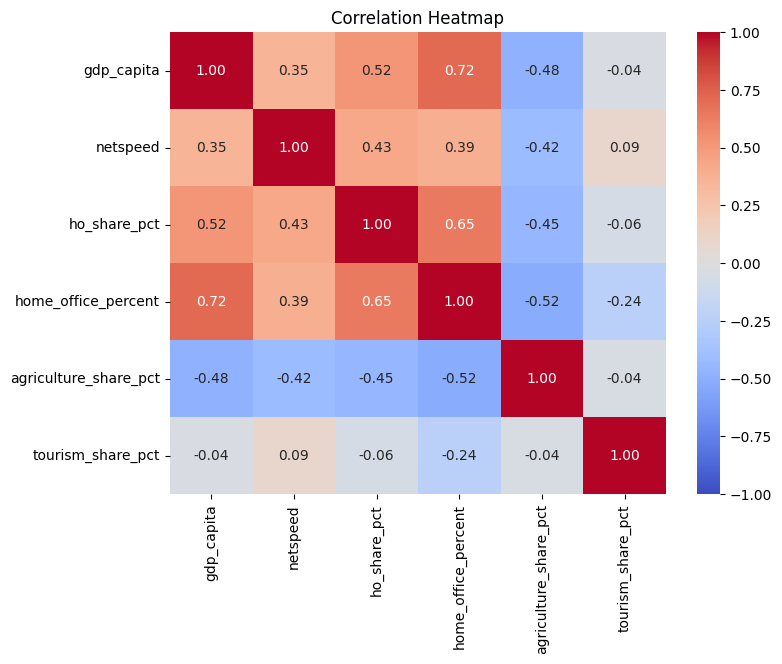

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = ["gdp_capita", "netspeed", "ho_share_pct", "home_office_percent", "agriculture_share_pct", "tourism_share_pct"]
corr_df = df_merged[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


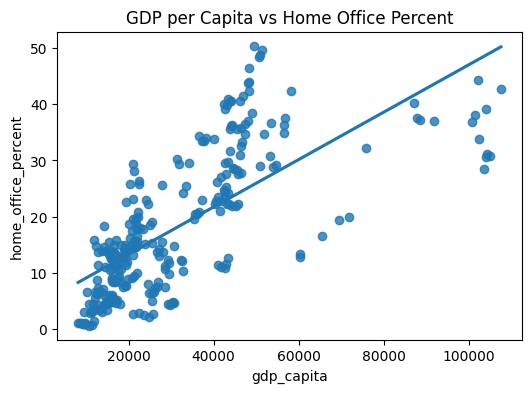

In [387]:
plt.figure(figsize=(6, 4))
sns.regplot(data=df_merged, x="gdp_capita", y="home_office_percent", ci=None)
plt.title("GDP per Capita vs Home Office Percent")
plt.show()

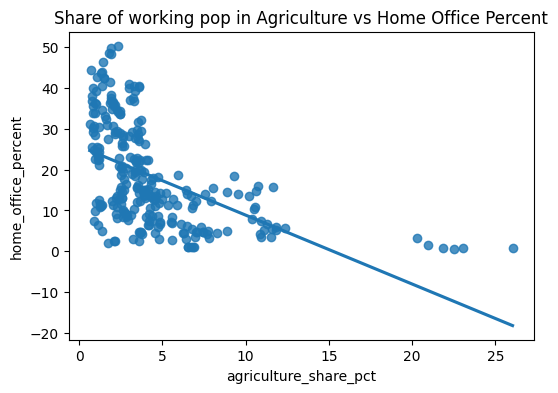

In [394]:
plt.figure(figsize=(6, 4))
sns.regplot(data=df_merged, x="agriculture_share_pct", y="home_office_percent", ci=None)
plt.title("Share of working pop in Agriculture vs Home Office Percent")
plt.show()

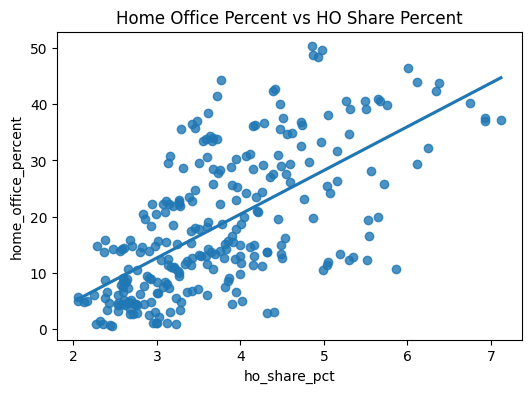

In [392]:

plt.figure(figsize=(6, 4))
sns.regplot(data=df_merged, x="ho_share_pct", y="home_office_percent", ci=None)
plt.title("Home Office Percent vs HO Share Percent")
plt.show()

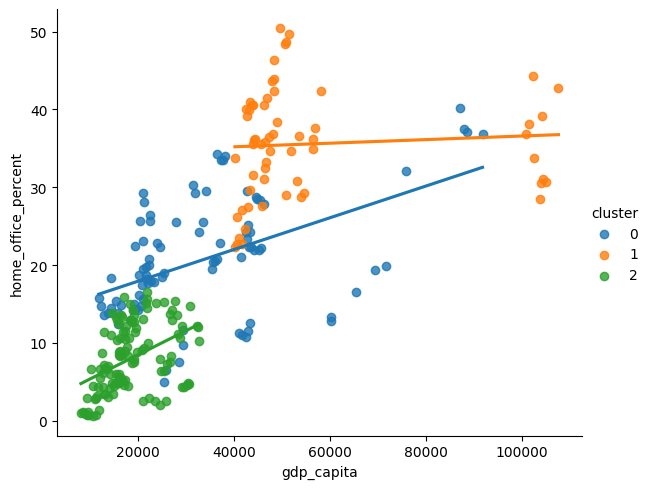

In [246]:
sns.lmplot(
    data=df_merged,
    x="gdp_capita",
    y="home_office_percent",
    hue="cluster",  
    ci=None,
    height=5,
    aspect=1.2
)

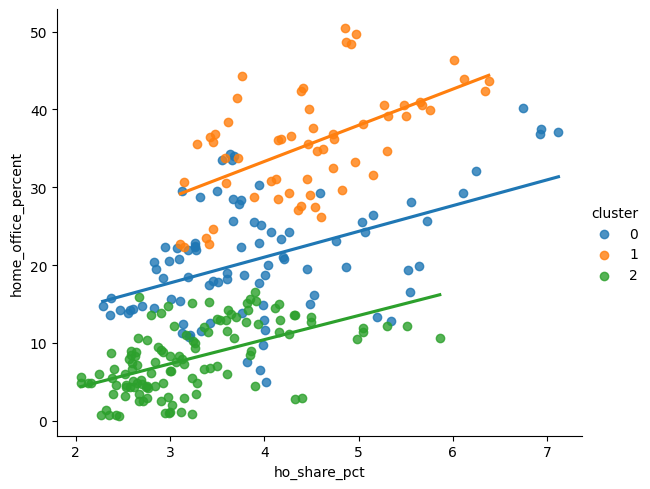

In [248]:
sns.lmplot(
    data=df_merged,
    x="ho_share_pct",
    y="home_office_percent",
    hue="cluster",  
    ci=None,
    height=5,
    aspect=1.2
)

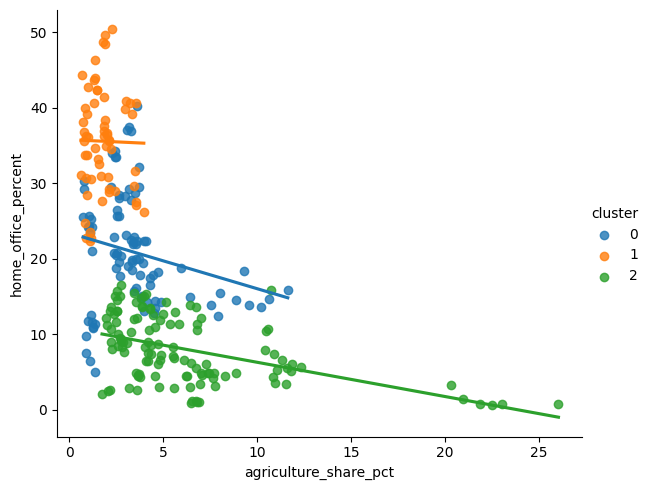

In [395]:
sns.lmplot(
    data=df_merged,
    x="agriculture_share_pct",
    y="home_office_percent",
    hue="cluster",  
    ci=None,
    height=5,
    aspect=1.2
)